# Iris Species classification with logistic regression

In [39]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import display

In [40]:
# import data
path = '../input/Iris.csv'
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]
data = pd.read_csv(path, converters={5: iris_type})
display(data.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [66]:
# split the features and outcomes
train_outcomes = data['Species']
train_features = data.iloc[:,3:5]
display(train_features.head())

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [67]:
# training
lr = Pipeline([('sc', StandardScaler()),('clf', LogisticRegression())])
lr.fit(train_features, train_outcomes.ravel())

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [68]:
# visualization
N, M = 500, 500
x1_min,x1_max = train_features.iloc[:,0].min(),train_features.iloc[:,0].max()
x2_min, x2_max = train_features.iloc[:, 1].min(), train_features.iloc[:, 1].max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)
x_test = np.stack((x1.flat, x2.flat), axis=1)

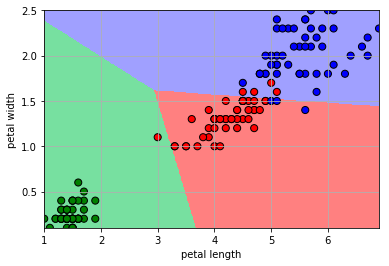

 accuracy: 94.00%


In [69]:
# visualization
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)
y_hat = y_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)
plt.scatter(train_features.iloc[:, 0], train_features.iloc[:, 1], c=train_outcomes, \
            edgecolors='k', s=50, cmap=cm_dark)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

# result
y_hat = lr.predict(train_features)
y = train_outcomes.values.reshape(-1)
result = y_hat == train_outcomes
# print(y_hat)
# print(result)
acc = np.mean(result)
print(' accuracy: %.2f%%' % (100 * acc))
